In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Parameters
UA, UB = 6, 0.6
a, b = 0.1, 0.8
l = b - a
T = 14
tau = 0.05
h = 0.1


def k(x):
    return x


def phi(x, UA, UB, a, b):
    return ((UB - UA) * (x - a)) / (b - a) + UA


def f(x):
    return x + x ** (1 / 3)

In [27]:
x_points = np.arange(a, b + h, h)
t_points = np.arange(0, T + tau, tau)

N = len(x_points)
M = len(t_points)

u = np.zeros((M, N))

u[0, :] = phi(x_points, UA, UB, a, b)

for n in range(0, M - 1):  # Time iteration
    for i in range(1, N - 1):  # Spatial iteration
        # Coefficients
        k_ip1_2 = (k(x_points[i]) + k(x_points[i + 1])) / 2  # k at (i+1/2)
        k_im1_2 = (k(x_points[i]) + k(x_points[i - 1])) / 2  # k at (i-1/2)

        u[n + 1, i] = (
                u[n, i]
                + (tau / h ** 2) * (k_ip1_2 * (u[n, i + 1] - u[n, i]) - k_im1_2 * (u[n, i] - u[n, i - 1]))
                + tau * f(x_points[i]) * (1 - np.exp(-t_points[n]))
        )
    u[n + 1, 0] = UA
    u[n + 1, -1] = UB

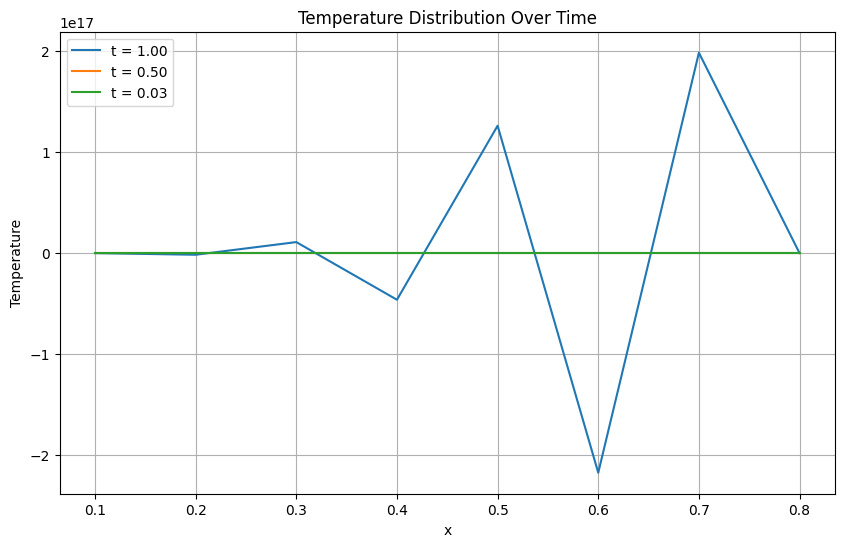

In [28]:
plt.figure(figsize=(10, 6))
times_to_plot = [0.5 * tau, 10 * tau, 20 * tau]
# times_to_plot = [0.5 * tau]
for t in times_to_plot[::-1]:
    n = int(t / tau)
    plt.plot(x_points, u[n, :], label=f't = {t:.2f}')

plt.title("Temperature Distribution Over Time")
plt.xlabel("x")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()